In [3]:
#install kaggle
!pip install -q kaggle

In [4]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"elinasingh","key":"744c89b63d74bb653ea77427c751027d"}'}

In [5]:
#create a kaggle folder
!mkdir ~/.kaggle

In [6]:
#copy the kaggle.json to folder created
!cp kaggle.json ~/.kaggle/

In [7]:
#Permission for the json to act
!chmod 600 ~/.kaggle/kaggle.json

In [8]:
#to list all datasets in kaggle
!kaggle datasets list

ref                                                                title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
zusmani/pakistan-toshakhana-files                                  Pakistan ToshaKhana Files                             1MB  2023-03-15 16:25:43           2306         98  1.0              
ramkrijal/tomato-daily-prices                                      Tomato Daily Prices                                  10KB  2023-03-10 15:39:14           1258         41  1.0              
themrityunjaypathak/covid-cases-and-deaths-worldwide               Covid Cases and Deaths WorldWide                      8KB  2023-02-01 12:22:51          14294        469  1.0              
datascientistanna/customers-dataset          

In [9]:
!kaggle datasets download -d vipoooool/new-plant-diseases-dataset

100% 2.70G/2.70G [02:09<00:00, 23.1MB/s]
100% 2.70G/2.70G [02:09<00:00, 22.4MB/s]


In [10]:
!unzip new-plant-diseases-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/273a7a9e-18be-4b6a-976a-fa5ffd69b731___RS_HL 4366_90deg.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_90deg.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_new30degFlipLR.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665_270deg.JPG  
  inflating: new plant diseases dataset(augmented)/New 

In [11]:
#importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [12]:
import keras
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from keras.applications.vgg19 import VGG19, preprocess_input,decode_predictions

In [13]:
#EDA
len(os.listdir("/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train"))

38

In [14]:
train_datagen = ImageDataGenerator(zoom_range=0.5, shear_range=0.3, horizontal_flip=True,preprocessing_function=preprocess_input)
val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [15]:
#preprocessing of data using builtin function (preprocessing_input)
train = train_datagen.flow_from_directory(directory= "/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train", 
                                          target_size=(256,256), 
                                          batch_size=32)
val = val_datagen.flow_from_directory(directory= "/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid", 
                                          target_size=(256,256), 
                                          batch_size=32)

Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


In [16]:
t_img, label=train.next()

In [17]:
t_img.shape

(32, 256, 256, 3)

In [18]:
def plotImage(img_arr,label):
  for im, l in zip(img_arr,label):
    plt.figure(figsize=(5,5))
    plt.imshow(im)
    plt.show()

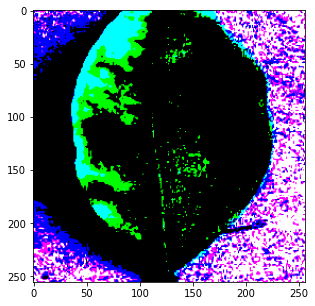

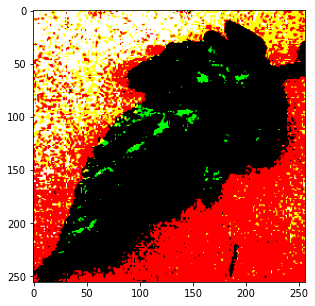

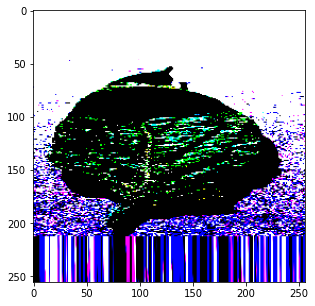

In [19]:
#visualising our data
plotImage(t_img[:3],label[:3])

# Building The Model

In [20]:
from keras.layers import Dense, Flatten
from keras.models import Model
from keras.applications.vgg19 import VGG19
import keras

In [21]:
base_model = VGG19(input_shape=(256,256,3), include_top=False)

80134624/80134624 [==============================] - 4s 0us/step


In [22]:
for layer in base_model.layers:
  layer.trainable = False

In [23]:
base_model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [24]:
X = Flatten()(base_model.output)
X = Dense(units = 38,activation = 'softmax')(X)

#Creating the model
model = Model(base_model.input, X)

In [25]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [26]:
model.compile(optimizer='adam', 
              loss=keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

# Early Stopping and Model Check point

In [27]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

#early stopping
es = EarlyStopping(monitor='val_accuracy',
                   min_delta = 0.01, 
                   patience = 3, 
                   verbose=1)

#model check point 
mc = ModelCheckpoint(filepath='best_model.h5',
                     monitor='val_accuracy',
                     min_delta = 0.01, 
                     patience = 3, 
                     verbose=1)

cb = [es,mc]

In [28]:
his = model.fit_generator(train,
                          steps_per_epoch=16,
                          epochs=50,
                          verbose=1,
                          callbacks=cb,
                          validation_data=val,
                          validation_steps=16)

<ipython-input-28-cde0eb368c9c>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  his = model.fit_generator(train,


Epoch 1/50
16/16 [==============================] - ETA: 0s - loss: 27.8529 - accuracy: 0.1875
Epoch 1: saving model to best_model.h5
16/16 [==============================] - 26s 861ms/step - loss: 27.8529 - accuracy: 0.1875 - val_loss: 18.0845 - val_accuracy: 0.3984
Epoch 2/50
16/16 [==============================] - ETA: 0s - loss: 14.9172 - accuracy: 0.4492
Epoch 2: saving model to best_model.h5
16/16 [==============================] - 13s 787ms/step - loss: 14.9172 - accuracy: 0.4492 - val_loss: 8.8087 - val_accuracy: 0.5938
Epoch 3/50
16/16 [==============================] - ETA: 0s - loss: 11.7913 - accuracy: 0.5137
Epoch 3: saving model to best_model.h5
16/16 [==============================] - 12s 729ms/step - loss: 11.7913 - accuracy: 0.5137 - val_loss: 9.8874 - val_accuracy: 0.6270
Epoch 4/50
16/16 [==============================] - ETA: 0s - loss: 11.5055 - accuracy: 0.5684
Epoch 4: saving model to best_model.h5
16/16 [==============================] - 14s 862ms/step - loss: 

In [29]:
#plotting the model
h=his.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

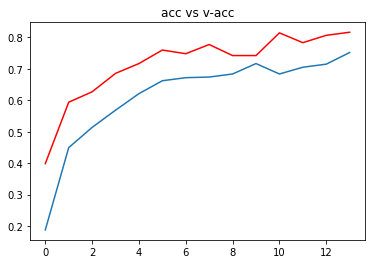

In [30]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'],c="red")
plt.title("acc vs v-acc")
plt.show()

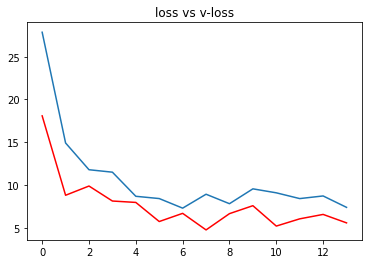

In [31]:
plt.plot(h['loss'])
plt.plot(h['val_loss'],c="red")
plt.title("loss vs v-loss")
plt.show()

In [32]:
#load best model
from keras.models import load_model
model = load_model("/content/best_model.h5")

In [33]:
#evaluation of our model
acc = model.evaluate_generator(val)[1]
print(f"The accuracy of your model is= {acc*100}%")

<ipython-input-33-e8abd9b8e124>:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  acc = model.evaluate_generator(val)[1]


The accuracy of your model is= 82.1420431137085%


In [46]:
ref = dict(zip(list(train.class_indices.values()) , list(train.class_indices.keys())))
ref

{0: 'Apple___Apple_scab',
 1: 'Apple___Black_rot',
 2: 'Apple___Cedar_apple_rust',
 3: 'Apple___healthy',
 4: 'Blueberry___healthy',
 5: 'Cherry_(including_sour)___Powdery_mildew',
 6: 'Cherry_(including_sour)___healthy',
 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 8: 'Corn_(maize)___Common_rust_',
 9: 'Corn_(maize)___Northern_Leaf_Blight',
 10: 'Corn_(maize)___healthy',
 11: 'Grape___Black_rot',
 12: 'Grape___Esca_(Black_Measles)',
 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 14: 'Grape___healthy',
 15: 'Orange___Haunglongbing_(Citrus_greening)',
 16: 'Peach___Bacterial_spot',
 17: 'Peach___healthy',
 18: 'Pepper,_bell___Bacterial_spot',
 19: 'Pepper,_bell___healthy',
 20: 'Potato___Early_blight',
 21: 'Potato___Late_blight',
 22: 'Potato___healthy',
 23: 'Raspberry___healthy',
 24: 'Soybean___healthy',
 25: 'Squash___Powdery_mildew',
 26: 'Strawberry___Leaf_scorch',
 27: 'Strawberry___healthy',
 28: 'Tomato___Bacterial_spot',
 29: 'Tomato___Early_blight',
 30: '

In [50]:
def prediction(path):
  img = load_img(path,target_size = (256,256))
  i = img_to_array(img)
  im = preprocess_input(i)
  img = np.expand_dims (im,axis=0)
  pred = np.argmax(model.predict(img))
  print(f"The image belongs to: {ref[pred]}")

In [51]:
path = "/content/test/test/AppleCedarRust4.JPG"
prediction(path)

1/1 [==============================] - 0s 33ms/step
The image belongs to: Apple___Cedar_apple_rust
